In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_iris, load_diabetes, load_wine, make_classification
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import BaseDecisionTree, plot_tree
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from TreeExports.iris.tree_trainer import export_names, export_forests_json, export_dataset
from sklearn.utils import shuffle


0.9210526315789473


In [2]:
X1, y1 = make_classification(
    n_samples=100,
    n_features=4,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=2,
    hypercube=True,
    random_state=14,
    class_sep=1,
)
X2, y2 = make_classification(
    n_samples=100,
    n_features=4,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=2,
    hypercube=True,
    random_state=1877,
    class_sep=1,
)

# Switch the columns
X2 = X2[:,[2,3,0,1]]

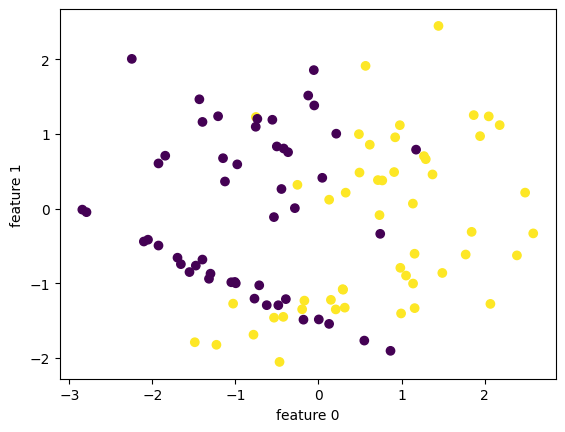

In [14]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

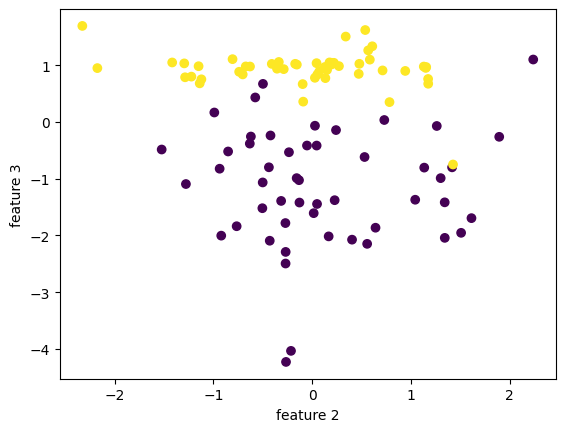

In [15]:
plt.scatter(X2[:, 2], X2[:, 3], c=y2)
plt.xlabel("feature 2")
plt.ylabel("feature 3")
plt.show()

In [5]:
X_columns = ["0", "1", "2", "3"]

In [6]:
X1, y1 = shuffle(X1, y1, random_state=14)
X2, y2 = shuffle(X2, y2, random_state=14)

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=34)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=34)

In [8]:
rf1 = RandomForestClassifier(n_estimators=100, verbose=1, random_state=14, max_features=None)
result1 = rf1.fit(X1_train, y1_train)

rf2 = RandomForestClassifier(n_estimators=100, verbose=1, random_state=14, max_features=None)
result2 = rf2.fit(X2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [9]:
rf1.estimators_[1].tree_.value

array([[[38., 37.]],

       [[38.,  5.]],

       [[ 0.,  3.]],

       [[38.,  2.]],

       [[35.,  0.]],

       [[ 3.,  2.]],

       [[ 3.,  0.]],

       [[ 0.,  2.]],

       [[ 0., 32.]]])

In [10]:
X1_train.shape

(75, 4)

In [11]:
X_train = np.concatenate((X1_train, X2_train))
y_train = np.concatenate((y1_train, y2_train))

X_test = np.concatenate((X1_test, X2_test))
y_test = np.concatenate((y1_test, y2_test))

In [12]:
export_forests_json([rf1, rf2])
export_names(X_columns, ["0", "1"])
export_dataset(X_train, y_train, X_columns, "trainDataset.csv")
export_dataset(X_test, y_test, X_columns, "testDataset.csv")